# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Bike Demand Project</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [Whatsapp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [LinkedIn](https://www.linkedin.com/company/techproeducation/mycompany/) |

<div class="alert alert-block alert-info alert">

# <span style=" color:red">WELCOME!
    
Welcome to "Bike Demand Visualization Project" which is the capstone project of Data Visualization Lessons . As you know recently, free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. Thus, it is aimed to reduce traffic congestion, noise and air pollution.

The aim of this project is to reveal the current patterns in the data by showing the historical data of London bike shares with visualization tools.

This will allow us to X-ray the data as part of the EDA process before setting up a machine learning model.</span>


<div class="alert alert-block alert-success ">

## <span style=" color:red">Determines 
    
Features
    
- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.
    
"weather_code" category description:

- 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
- 2 = scattered clouds / few clouds
- 3 = Broken clouds
- 4 = Cloudy
- 7 = Rain/ light Rain shower/ Light rain
- 10 = rain with thunderstorm
- 26 = snowfall
- 94 = Freezing Fog
    
Initially, the task of discovering data will be waiting for you as always. Recognize features, detect missing values, outliers etc. Review the data from various angles in different time breakdowns. For example, visualize the distribution of bike shares by day of the week. With this graph, you will be able to easily observe and make inferences how people's behavior changes daily. Likewise, you can make hourly, monthly, seasonally etc. analyzes. In addition, you can analyze correlation of variables with a heatmap.
    
# <span style=" color:red">Tasks
</span>





<div class="alert alert-warning alert-info">
<span style=" color:red">1. Import Libraries
</span>

In [11]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 

import seaborn as sns

import missingno as msno
from skimpy import skim

import warnings

warnings.filterwarnings("ignore")

<div class="alert alert-warning alert-info">
<span style=" color:red">2. Read Dataset
</span>

In [12]:
df = pd.read_csv("store_sharing.csv")
df

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [14]:
df["weather_code"] = df.weather_code.astype("str")
df["is_holiday"] = df.is_holiday.astype("bool")
df["is_weekend"] = df.is_weekend.astype("bool")
df["season"] = df.season.astype("str")

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  object 
 7   is_holiday    17414 non-null  bool   
 8   is_weekend    17414 non-null  bool   
 9   season        17414 non-null  object 
dtypes: bool(2), float64(4), int64(1), object(3)
memory usage: 1.1+ MB


In [16]:
df["season"] = df["season"].replace({"0.0" : "Spring", "1.0" : "Summer", "2.0" : "Fall", "3.0": "Winter" })
df["season"].value_counts()

season
Spring    4394
Summer    4387
Winter    4330
Fall      4303
Name: count, dtype: int64

<div class="alert alert-warning alert-info">
<span style=" color:red">3. Check missing values and if there are any dublicate rows or not.
</span>

In [17]:
df.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [18]:
df.timestamp.duplicated().sum()

0

In [19]:
df.duplicated().sum()

0

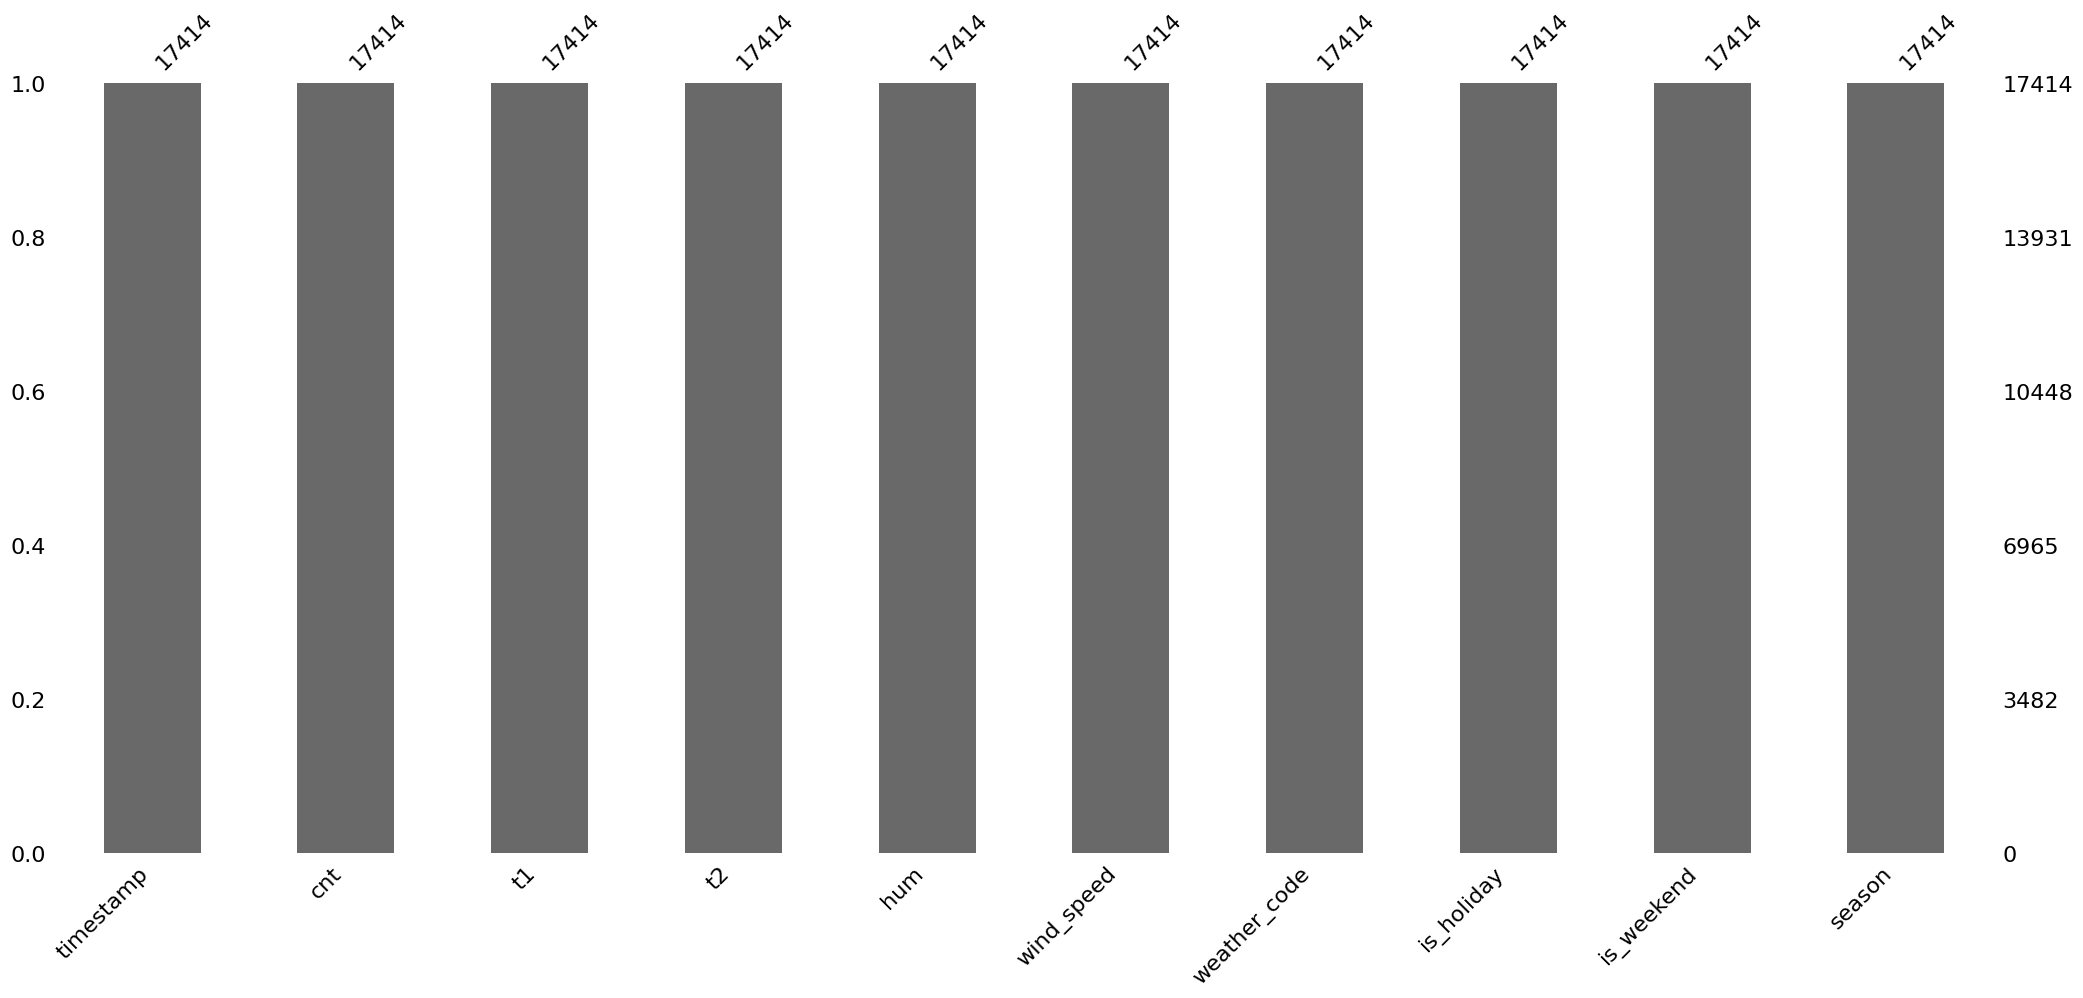

In [20]:
msno.bar(df);

In [21]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 17414  │ │ float64     │ 4     │                                                          │
│ │ Number of columns │ 10     │ │ string      │ 3     │                                                          │
│ └───────────────────┴────────┘ │ bool        │ 2     │                                                          │
│                                │ int32       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃ column_name      ┃ NA   ┃ NA %    ┃ mean    ┃ sd     ┃ p0     ┃ p25   ┃ p50   ┃ p75    ┃ p100   ┃ hist     ┃  │
│ ┡━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━┩  │
│ │ cnt              │    0 │       0 │    1100 │   1100 │      0 │   260 │   840 │   1700 │   7900 │   ▇▃▁    │  │
│ │ t1               │    0 │       0 │      12 │    5.6 │   -1.5 │     8 │    12 │     16 │     34 │  ▁▆▇▅▁   │  │
│ │ t2               │    0 │       0 │      12 │    6.6 │     -6 │     6 │    12 │     16 │     34 │  ▁▆▆▇▂   │  │
│ │ hum              │    0 │       0 │      72 │     14 │     20 │    63 │    74 │     83 │    100 │   ▁▃▆▇▅  │  │
│ │ wind_speed       │    0 │       0 │      16 │    7.9 │      0 │    10 │    15 │     20 │     56 │   ▅▇▅▁   │  │
│ └──────────────────┴──────┴─────────┴─────────┴────────┴────────┴───────┴───────┴────────┴────────┴──────────┘  │
│                                                      bool                                                       │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                        ┃ true            ┃ true rate                     ┃ hist                ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ is_holiday                         │             384 │                         0.022 │          ▇          │  │
│ │ is_weekend                         │            4970 │                          0.29 │       ▇    ▃        │  │
│ └────────────────────────────────────┴─────────────────┴───────────────────────────────┴─────────────────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                ┃ NA     ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ timestamp                  │      0 │          0 │                            2 │                    34828 │  │
│ │ weather_code               │      0 │          0 │                            1 │                    17414 │  │
│ │ season                     │      0 │          0 │                            1 │                    17414 │  │
│ └────────────────────────────┴────────┴────────────┴──

<div class="alert alert-warning alert-info">
<span style=" color:red">4. Plot the distribution of various discrete features on (Season, haliday, weekend and weathercode)
</span>


In [22]:
df.season

0        Winter
1        Winter
2        Winter
3        Winter
4        Winter
          ...  
17409    Winter
17410    Winter
17411    Winter
17412    Winter
17413    Winter
Name: season, Length: 17414, dtype: object

In [23]:
df.weather_code.value_counts()

weather_code
1.0     6150
2.0     4034
3.0     3551
7.0     2141
4.0     1464
26.0      60
10.0      14
Name: count, dtype: int64

In [29]:
df["weather_code"].replace({"10.0": "26.0", }, regex=True).value_counts()

weather_code
1.0     6150
2.0     4034
3.0     3551
7.0     2141
4.0     1464
26.0      74
Name: count, dtype: int64

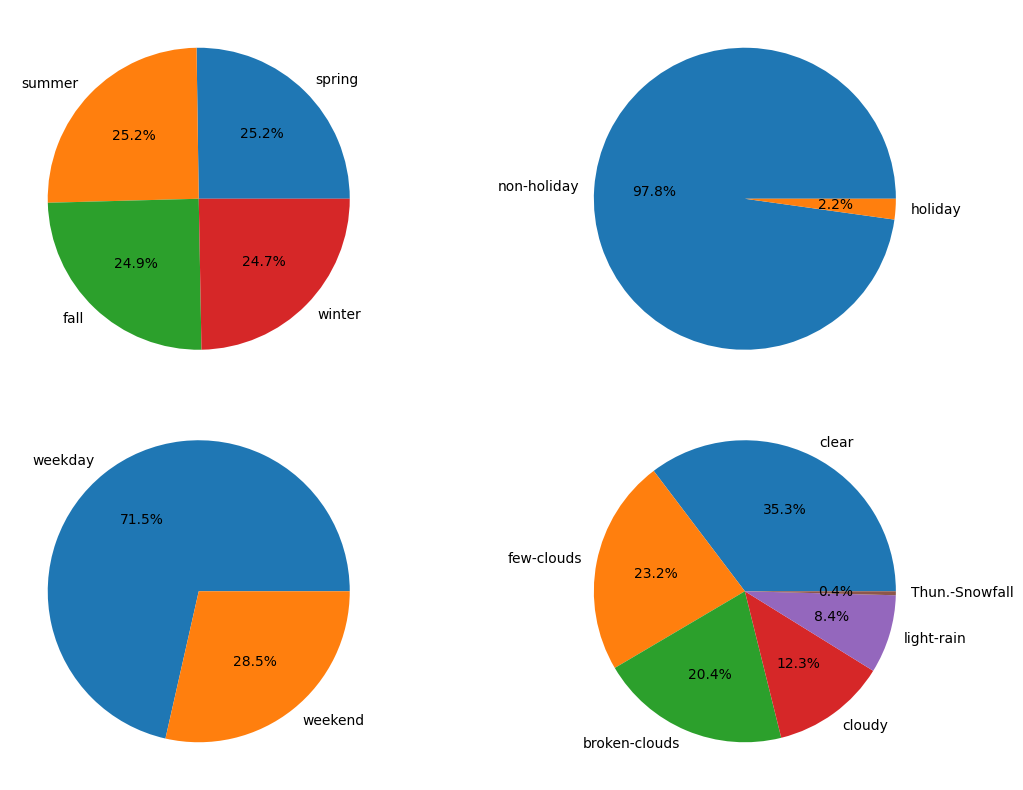

In [30]:
fig, ax = plt.subplots(2,2, figsize=(12,8))
labels1 = ["spring", "summer", "fall", "winter"]
labels2 = ["non-holiday", "holiday"]
labels3 = ["weekday", "weekend"]
labels4 = ["clear", "few-clouds","broken-clouds", "cloudy", "light-rain", "Thun.-Snowfall"]

ax[0][0].pie(df["season"].value_counts(), labels = labels1, labeldistance = 1.1, autopct = "%.1f%%",textprops={'fontsize': 10})
ax[0][1].pie(df["is_holiday"].value_counts(), labels=labels2, labeldistance = 1.1, autopct = "%.1f%%",textprops={'fontsize': 10})
ax[1][0].pie(df["is_weekend"].value_counts(), labels=labels3, labeldistance = 1.1, autopct = "%.1f%%",textprops={'fontsize': 10})
ax[1][1].pie(df["weather_code"].replace({"10.0": "26.0", }, regex=True).value_counts(), labels=labels4, labeldistance = 1.1, autopct = "%.1f%%",textprops={'fontsize': 10})
plt.tight_layout();

# weather_code
sns.countplot(x='weather_code',data=df)

1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
2 = scattered clouds / few clouds
3 = Broken clouds
4 = Cloudy
7 = Rain/ light Rain shower/ Light rain
10 = rain with thunderstorm
26 = snowfall
94 = Freezing Fog

<div class="alert alert-warning alert-info">
<span style=" color:red">5. Look at the data type of each variable, transform timestamp in Datetime type, and set it as index.
</span>

In [32]:
df.dtypes

timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code     object
is_holiday         bool
is_weekend         bool
season           object
dtype: object

In [33]:
df["timestamp"]= pd.to_datetime(df["timestamp"])

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     17414 non-null  datetime64[ns]
 1   cnt           17414 non-null  int64         
 2   t1            17414 non-null  float64       
 3   t2            17414 non-null  float64       
 4   hum           17414 non-null  float64       
 5   wind_speed    17414 non-null  float64       
 6   weather_code  17414 non-null  object        
 7   is_holiday    17414 non-null  bool          
 8   is_weekend    17414 non-null  bool          
 9   season        17414 non-null  object        
dtypes: bool(2), datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 1.1+ MB


In [35]:
df.set_index("timestamp", drop=False, inplace=True)
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,,
2015-01-04 00:00:00,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,False,True,Winter
2015-01-04 01:00:00,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,False,True,Winter
2015-01-04 02:00:00,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,False,True,Winter
2015-01-04 03:00:00,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,False,True,Winter
2015-01-04 04:00:00,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,False,True,Winter


<div class="alert alert-warning alert-info">
<span style=" color:red">6. Make feature engineering. Extract new columns (day of the week, day of the month, hour, month, season, year etc.)
</span>

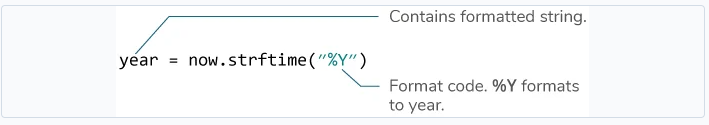

strftime()

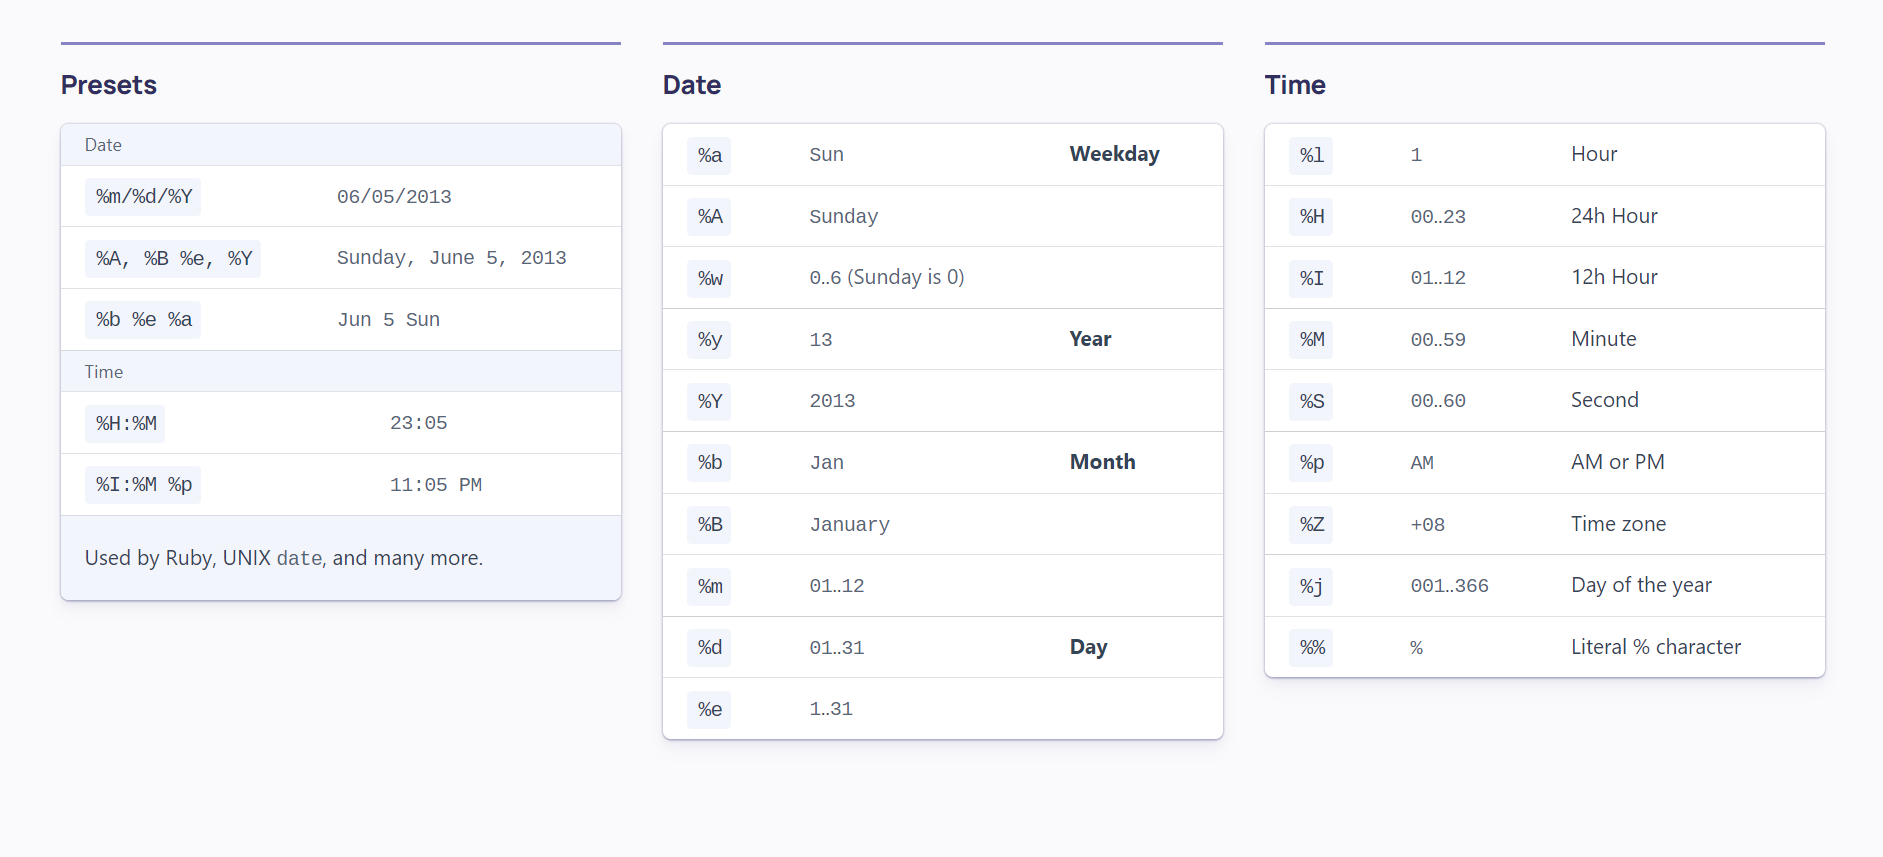

In [36]:
df["day"] = df.timestamp.dt.strftime("%a")
df.day

timestamp
2015-01-04 00:00:00    Sun
2015-01-04 01:00:00    Sun
2015-01-04 02:00:00    Sun
2015-01-04 03:00:00    Sun
2015-01-04 04:00:00    Sun
                      ... 
2017-01-03 19:00:00    Tue
2017-01-03 20:00:00    Tue
2017-01-03 21:00:00    Tue
2017-01-03 22:00:00    Tue
2017-01-03 23:00:00    Tue
Name: day, Length: 17414, dtype: object

In [37]:
df["day_of_month"] = df.timestamp.dt.strftime("%d")
df.day_of_month

timestamp
2015-01-04 00:00:00    04
2015-01-04 01:00:00    04
2015-01-04 02:00:00    04
2015-01-04 03:00:00    04
2015-01-04 04:00:00    04
                       ..
2017-01-03 19:00:00    03
2017-01-03 20:00:00    03
2017-01-03 21:00:00    03
2017-01-03 22:00:00    03
2017-01-03 23:00:00    03
Name: day_of_month, Length: 17414, dtype: object

In [38]:
df["hour"] = df.timestamp.dt.strftime("%H")
df.hour

timestamp
2015-01-04 00:00:00    00
2015-01-04 01:00:00    01
2015-01-04 02:00:00    02
2015-01-04 03:00:00    03
2015-01-04 04:00:00    04
                       ..
2017-01-03 19:00:00    19
2017-01-03 20:00:00    20
2017-01-03 21:00:00    21
2017-01-03 22:00:00    22
2017-01-03 23:00:00    23
Name: hour, Length: 17414, dtype: object

In [39]:
df["month"] = df.timestamp.dt.strftime("%m")
df.month

timestamp
2015-01-04 00:00:00    01
2015-01-04 01:00:00    01
2015-01-04 02:00:00    01
2015-01-04 03:00:00    01
2015-01-04 04:00:00    01
                       ..
2017-01-03 19:00:00    01
2017-01-03 20:00:00    01
2017-01-03 21:00:00    01
2017-01-03 22:00:00    01
2017-01-03 23:00:00    01
Name: month, Length: 17414, dtype: object

In [40]:
df["month_of_year"] = df.timestamp.dt.strftime("%m/%Y")
df.month_of_year

timestamp
2015-01-04 00:00:00    01/2015
2015-01-04 01:00:00    01/2015
2015-01-04 02:00:00    01/2015
2015-01-04 03:00:00    01/2015
2015-01-04 04:00:00    01/2015
                        ...   
2017-01-03 19:00:00    01/2017
2017-01-03 20:00:00    01/2017
2017-01-03 21:00:00    01/2017
2017-01-03 22:00:00    01/2017
2017-01-03 23:00:00    01/2017
Name: month_of_year, Length: 17414, dtype: object

In [42]:
df["year"] = df.timestamp.dt.strftime("%Y")
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,day,day_of_month,hour,month,month_of_year,year
timestamp,,,,,,,,,,,,,,,,
2015-01-04 00:00:00,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,False,True,Winter,Sun,04,00,01,01/2015,2015
2015-01-04 01:00:00,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,False,True,Winter,Sun,04,01,01,01/2015,2015
2015-01-04 02:00:00,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,False,True,Winter,Sun,04,02,01,01/2015,2015
2015-01-04 03:00:00,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,False,True,Winter,Sun,04,03,01,01/2015,2015
2015-01-04 04:00:00,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,False,True,Winter,Sun,04,04,01,01/2015,2015


In [43]:
df.cnt.sum()

19905972

In [44]:
df.cnt.mean()

1143.1016423567244

In [45]:
daily_usage = 1143*24
daily_usage

27432

In [46]:
total_days = df.cnt.sum() / daily_usage
total_days

725.6478565179352

<div class="alert alert-warning alert-info">
<span style=" color:red">7. Visualize the correlation with a heatmap
</span>

In [47]:
numeric_df = df.select_dtypes(include=[np.number])

corelation_matrix = numeric_df.corr()
corelation_matrix

,cnt,t1,t2,hum,wind_speed
cnt,1.000000,0.388798,0.369035,-0.462901,0.116295
t1,0.388798,1.000000,0.988344,-0.447781,0.145471
t2,0.369035,0.988344,1.000000,-0.403495,0.088409
hum,-0.462901,-0.447781,-0.403495,1.000000,-0.287789
wind_speed,0.116295,0.145471,0.088409,-0.287789,1.000000


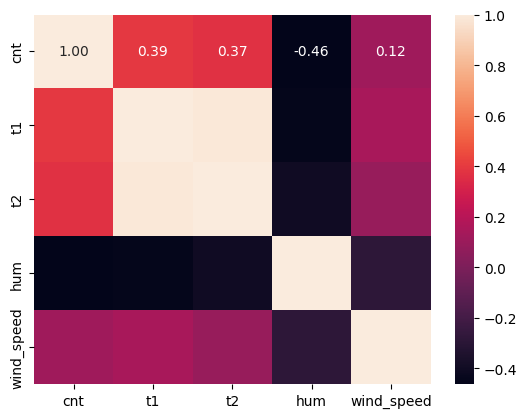

In [48]:
sns.heatmap(data=corelation_matrix, annot=True, fmt=".2f");

<div class="alert alert-warning alert-info">
<span style=" color:red">8. Visualize the correlation of the target variable and the other features with barplot
</span>

In [49]:
numeric_df.corrwith(numeric_df["cnt"])

cnt           1.000000
t1            0.388798
t2            0.369035
hum          -0.462901
wind_speed    0.116295
dtype: float64

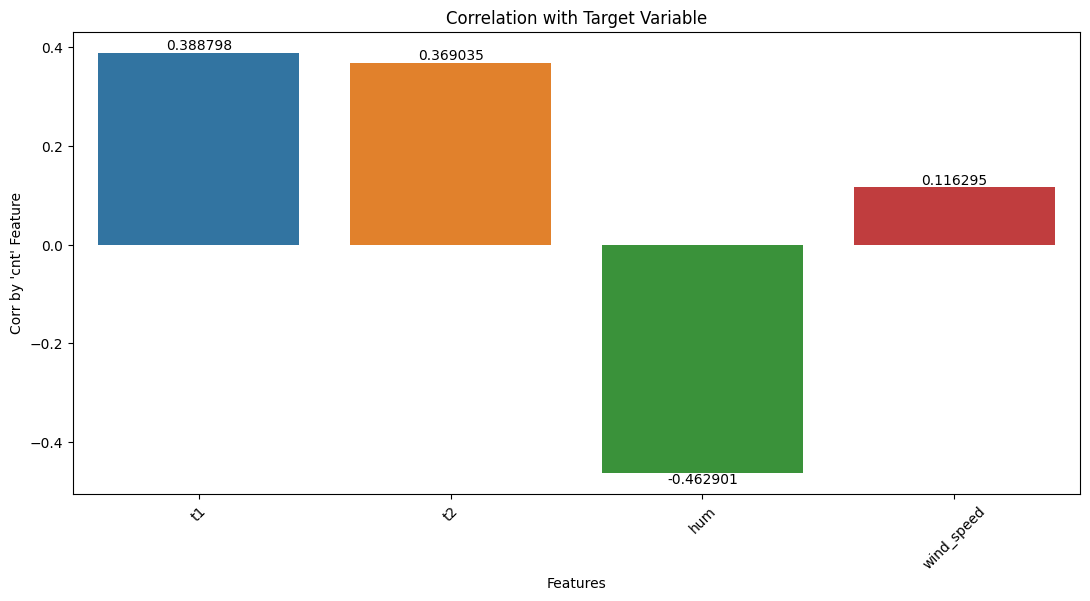

In [50]:
tar_corr = corelation_matrix["cnt"].drop("cnt")

plt.figure(figsize=(13, 6))
ax = sns.barplot(x=tar_corr.index, y=tar_corr.values, palette="tab10")

for container in ax.containers:
    ax.bar_label(container)

plt.title('Correlation with Target Variable')
plt.xlabel("Features")
plt.ylabel("Corr by 'cnt' Feature")
plt.xticks(rotation= 45)

plt.show()

<div class="alert alert-warning alert-info">
<span style=" color:red">9. Plot bike shares over time use lineplot.
</span>

In [51]:
df.sample(10)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,day,day_of_month,hour,month,month_of_year,year
timestamp,,,,,,,,,,,,,,,,
2016-09-29 17:00:00,2016-09-29 17:00:00,4152,19.0,19.0,46.0,26.0,2.0,False,False,Fall,Thu,29,17,09,09/2016,2016
2015-05-04 08:00:00,2015-05-04 08:00:00,455,13.5,13.5,65.0,20.5,3.0,True,False,Spring,Mon,04,08,05,05/2015,2015
2016-05-31 09:00:00,2016-05-31 09:00:00,398,11.0,11.0,94.0,27.0,7.0,False,False,Spring,Tue,31,09,05,05/2016,2016
2016-04-24 04:00:00,2016-04-24 04:00:00,90,5.5,2.5,78.5,13.0,7.0,False,True,Spring,Sun,24,04,04,04/2016,2016
2015-03-18 23:00:00,2015-03-18 23:00:00,345,7.0,5.0,78.5,12.0,4.0,False,False,Spring,Wed,18,23,03,03/2015,2015
2016-08-06 09:00:00,2016-08-06 09:00:00,1225,19.5,19.5,62.0,8.0,1.0,False,True,Summer,Sat,06,09,08,08/2016,2016
2016-01-28 21:00:00,2016-01-28 21:00:00,662,9.0,5.5,71.0,27.0,1.0,False,False,Winter,Thu,28,21,01,01/2016,2016
2015-05-04 15:00:00,2015-05-04 15:00:00,2981,17.0,17.0,52.0,14.0,2.0,True,False,Spring,Mon,04,15,05,05/2015,2015
2015-07-19 01:00:00,2015-07-19 01:00:00,704,17.0,17.0,59.0,9.0,1.0,False,True,Summer,Sun,19,01,07,07/2015,2015


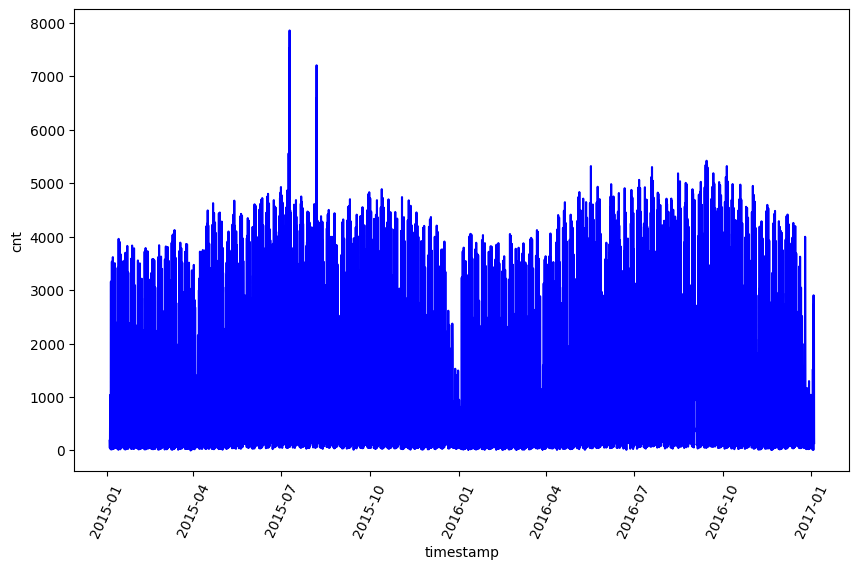

In [52]:
fig, ax = plt.subplots(figsize = (10, 6))

sns.lineplot(x=df.timestamp, y=df.cnt, color="b")

plt.xticks(rotation=65);

In [53]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
timestamp,17414,2016-01-03 22:31:00.571953664,2015-01-04 00:00:00,2015-07-04 20:15:00,2016-01-03 15:30:00,2016-07-04 15:45:00,2017-01-03 23:00:00,NaN
cnt,17414.0,1143.101642,0.0,257.0,844.0,1671.75,7860.0,1085.108068
t1,17414.0,12.468091,-1.5,8.0,12.5,16.0,34.0,5.571818
t2,17414.0,11.520836,-6.0,6.0,12.5,16.0,34.0,6.615145
hum,17414.0,72.324954,20.5,63.0,74.5,83.0,100.0,14.313186
wind_speed,17414.0,15.913063,0.0,10.0,15.0,20.5,56.5,7.89457


In [35]:
df[df.cnt > 6000]

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,day,day_of_month,hour,month,month_of_year,year
timestamp,,,,,,,,,,,,,,,,
2015-07-09 08:00:00,2015-07-09 08:00:00,7531,14.5,14.5,61.0,19.0,2.0,False,False,Summer,Thu,09,08,07,07/2015,2015
2015-07-09 16:00:00,2015-07-09 16:00:00,6033,23.0,22.0,26.0,11.0,1.0,False,False,Summer,Thu,09,16,07,07/2015,2015
2015-07-09 17:00:00,2015-07-09 17:00:00,7860,23.0,22.0,27.0,11.0,1.0,False,False,Summer,Thu,09,17,07,07/2015,2015
2015-07-09 18:00:00,2015-07-09 18:00:00,6913,22.5,21.5,29.0,13.0,1.0,False,False,Summer,Thu,09,18,07,07/2015,2015
2015-08-06 08:00:00,2015-08-06 08:00:00,6585,19.0,19.0,78.0,12.0,7.0,False,False,Summer,Thu,06,08,08,08/2015,2015
2015-08-06 17:00:00,2015-08-06 17:00:00,7208,22.5,22.5,55.0,17.5,2.0,False,False,Summer,Thu,06,17,08,08/2015,2015
2015-08-06 18:00:00,2015-08-06 18:00:00,6394,21.5,21.5,58.5,20.0,2.0,False,False,Summer,Thu,06,18,08,08/2015,2015


<div class="alert alert-warning alert-info">
<span style=" color:red">10. Plot bike shares by months and month_of_year (use lineplot, pointplot, barplot).
</span>

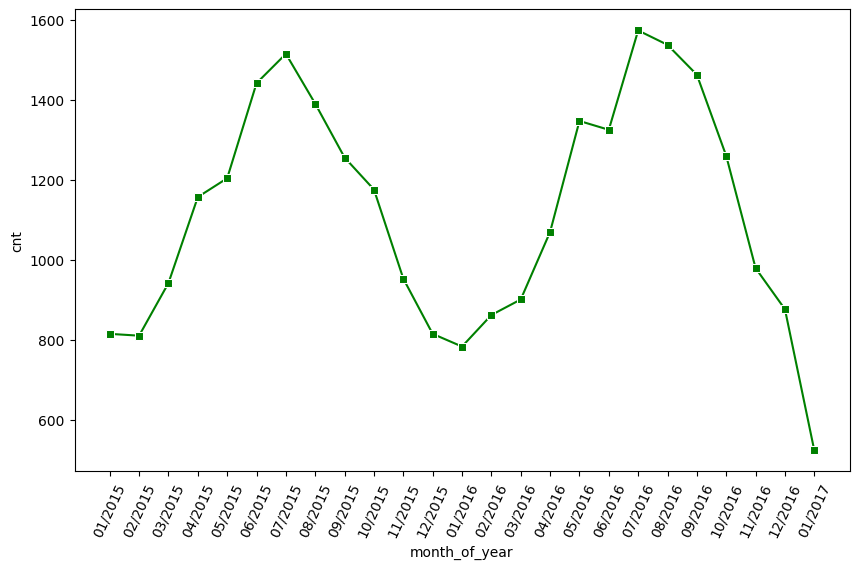

In [54]:
fig, ax = plt.subplots(figsize = (10, 6))

sns.lineplot(x=df.month_of_year, y=df.cnt,ci=None, color="g", marker="s")

plt.xticks(rotation=65);

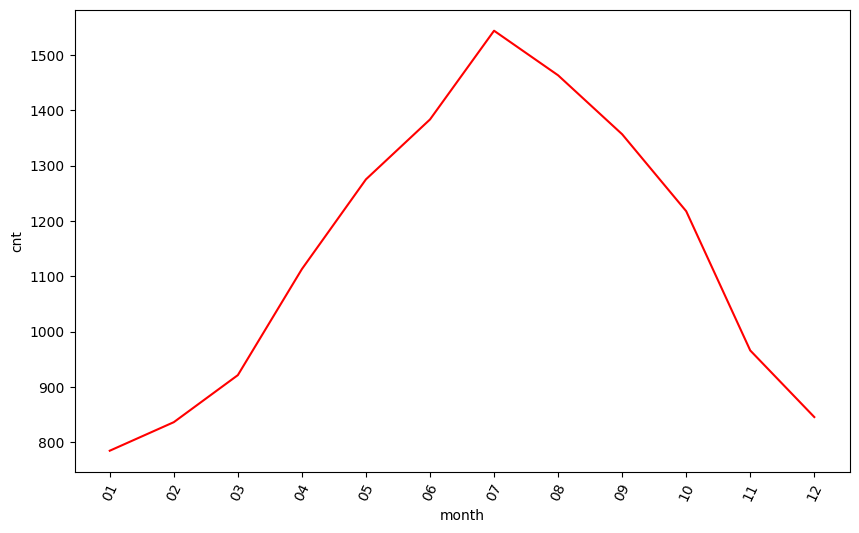

In [55]:
fig, ax = plt.subplots(figsize = (10, 6))

sns.lineplot(x=df.month, y=df.cnt, ci=None, color="r")

plt.xticks(rotation=65);

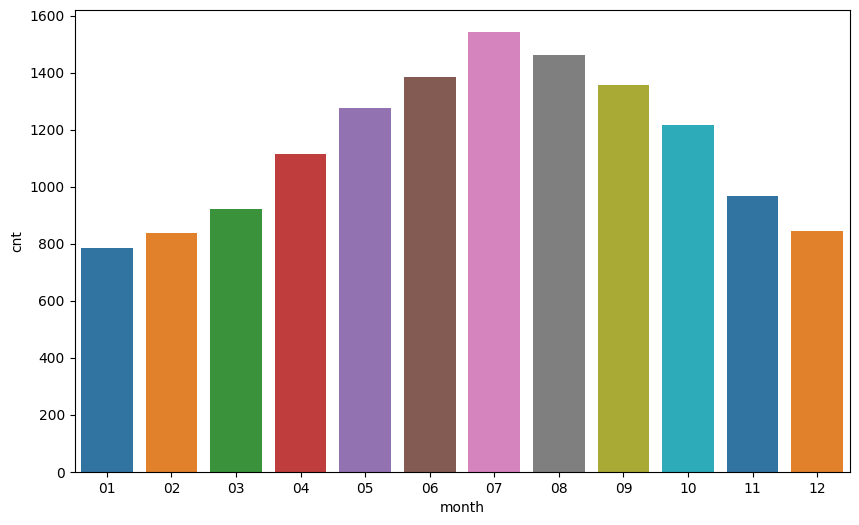

In [56]:
plt.figure(figsize=(10,6))

sns.barplot(x = "month", y = "cnt", data=df, ci=None, palette="tab10");

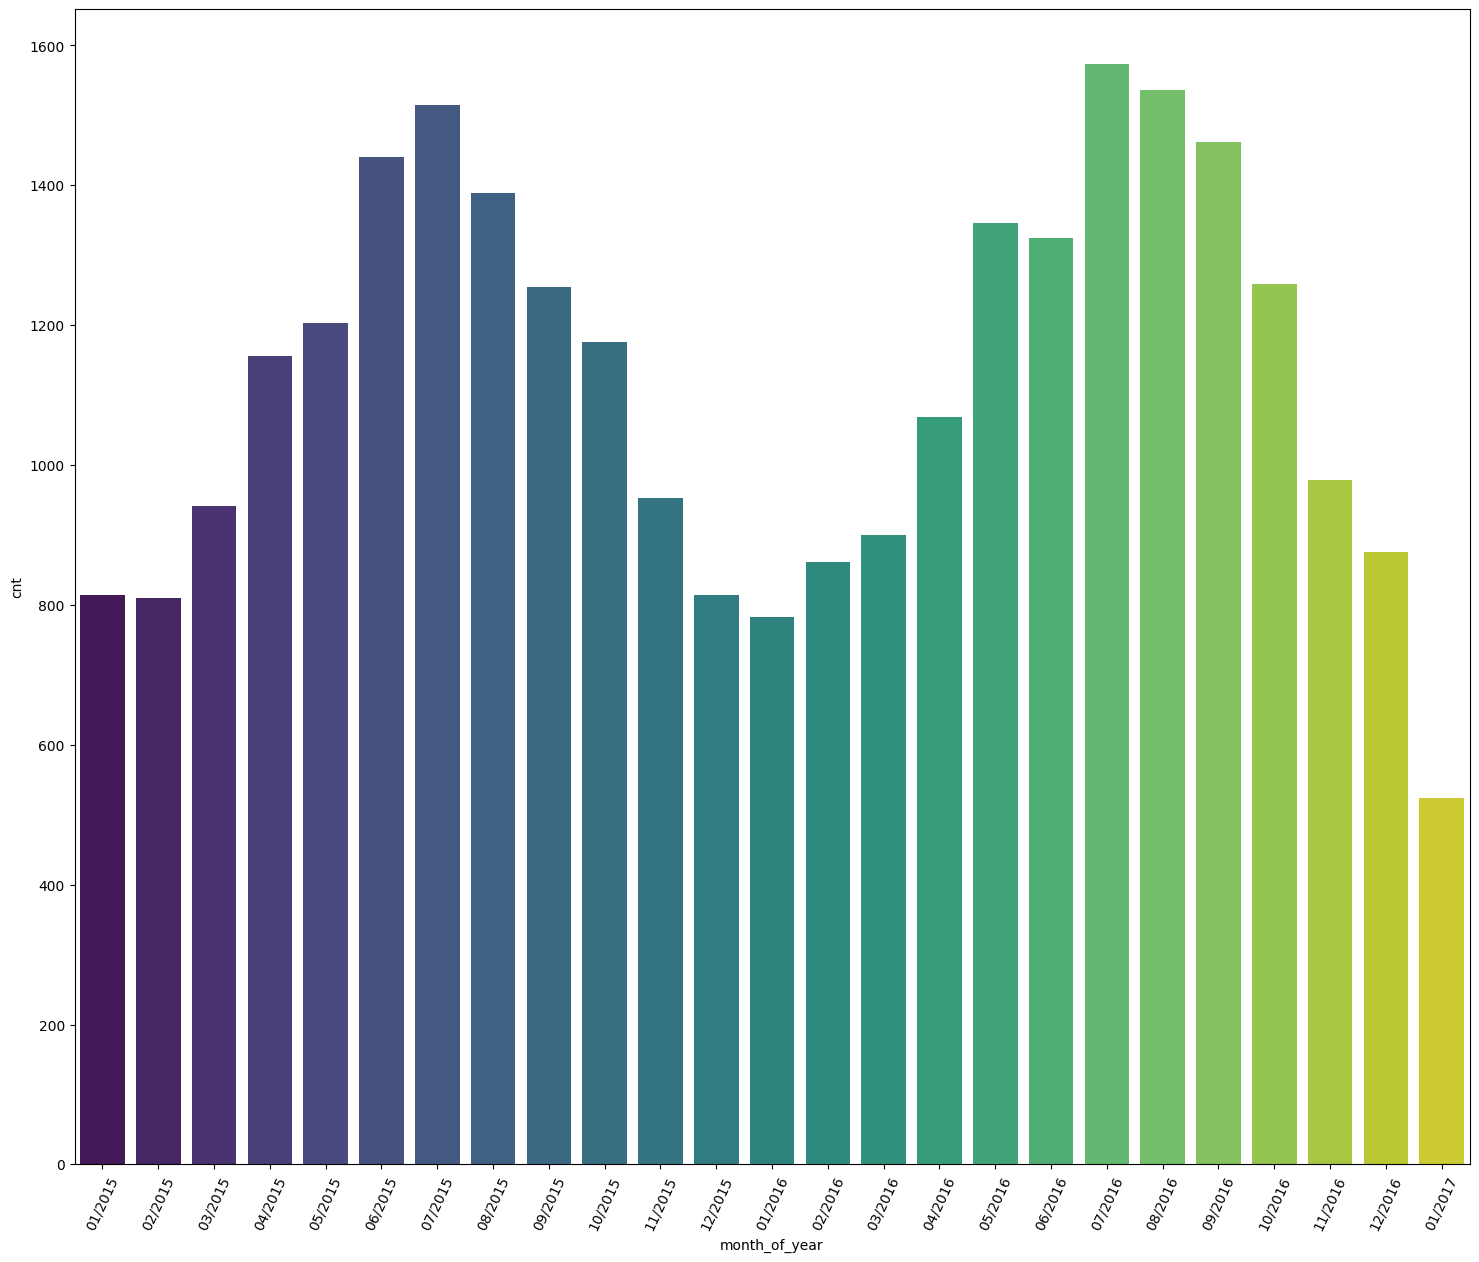

In [57]:
plt.figure(figsize=(18,15))

sns.barplot(x = "month_of_year", y = "cnt", data=df,ci=None, palette="viridis")
    
plt.xticks(rotation= 65);

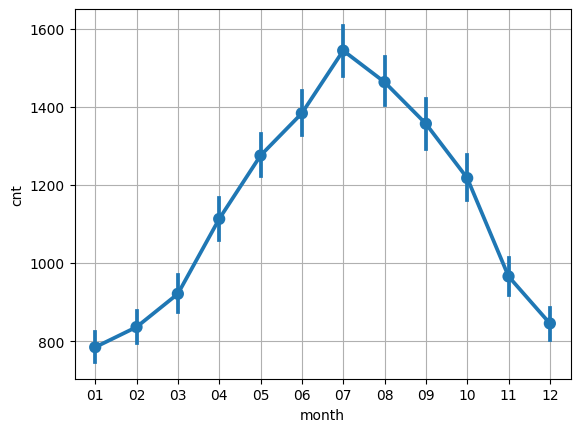

In [58]:
sns.pointplot(x = "month", y = "cnt", data=df)
plt.grid(True);

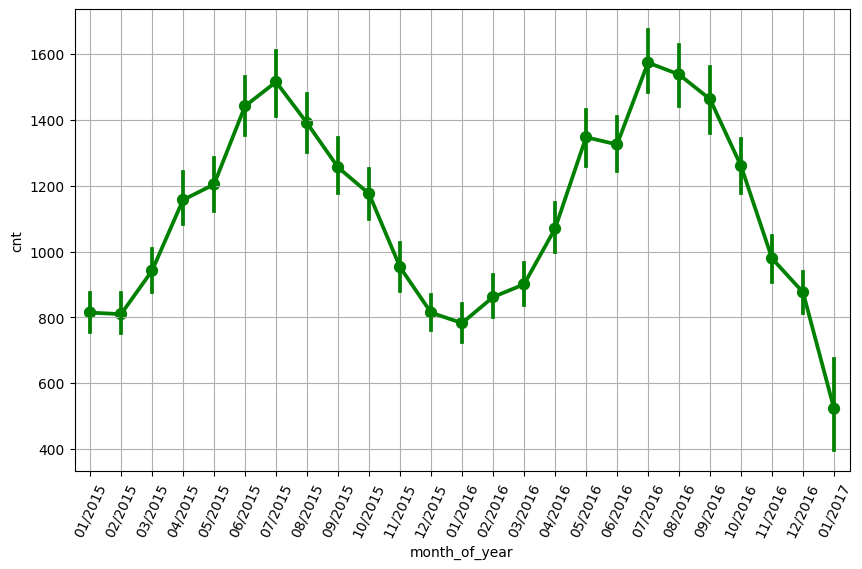

In [59]:
plt.figure(figsize=(10,6))
sns.pointplot(x = "month_of_year", y = "cnt", data=df, color="g")

plt.xticks(rotation = 65)
plt.grid(True);

<div class="alert alert-warning alert-info">
<span style=" color:red">11. Plot bike shares by hours on (holidays, weekend, season).
</span>

In [60]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,day,day_of_month,hour,month,month_of_year,year
timestamp,,,,,,,,,,,,,,,,
2015-01-04 00:00:00,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,False,True,Winter,Sun,04,00,01,01/2015,2015
2015-01-04 01:00:00,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,False,True,Winter,Sun,04,01,01,01/2015,2015
2015-01-04 02:00:00,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,False,True,Winter,Sun,04,02,01,01/2015,2015
2015-01-04 03:00:00,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,False,True,Winter,Sun,04,03,01,01/2015,2015
2015-01-04 04:00:00,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,False,True,Winter,Sun,04,04,01,01/2015,2015


In [61]:
df.day_of_month.value_counts().index.sort_values()

Index(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31'],
      dtype='object', name='day_of_month')

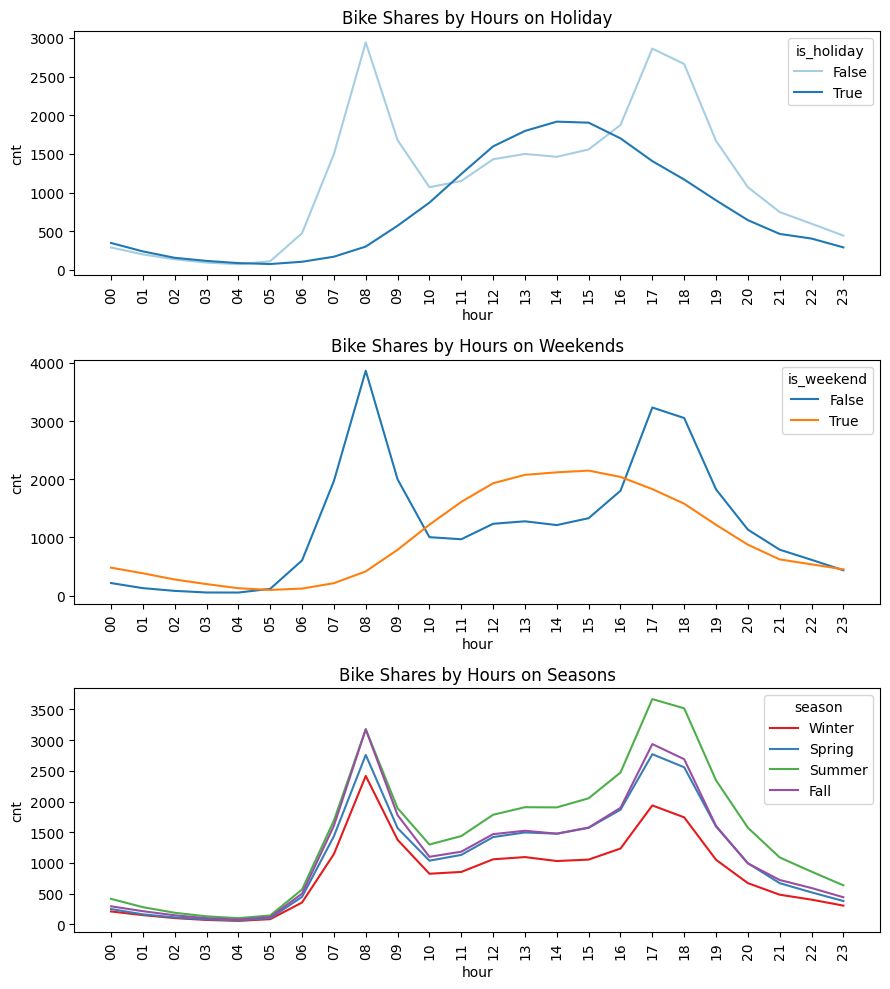

In [62]:
plt.figure(figsize= (9, 10))

plt.subplot(3, 1, 1)
sns.lineplot(x= "hour", y= "cnt", hue= "is_holiday", data= df, palette= "Paired",ci=None )
plt.title("Bike Shares by Hours on Holiday")
plt.xticks(rotation = 90)

plt.subplot(3, 1, 2)
sns.lineplot(x= "hour", y= "cnt", hue= "is_weekend", data= df,ci=None)
plt.title("Bike Shares by Hours on Weekends")
plt.xticks(rotation = 90)

plt.subplot(3, 1, 3)
sns.lineplot(x= "hour", y= "cnt", hue= "season", data= df, palette= "Set1",ci=None)
plt.title("Bike Shares by Hours on Seasons")
plt.xticks(rotation = 90)

plt.tight_layout();

<div class="alert alert-warning alert-info">
<span style=" color:red"> 12. Plot bike shares by day of week.

- You may want to see whether it is a holiday or not
</span>

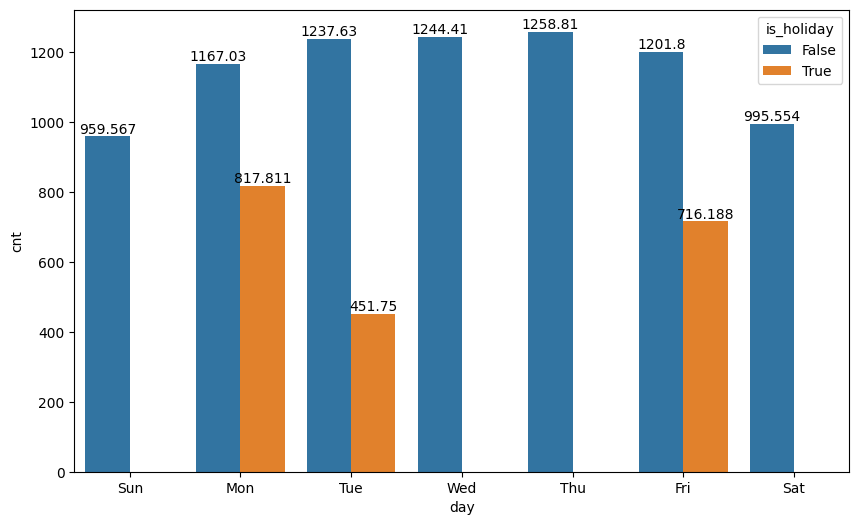

In [63]:
plt.figure(figsize=(10,6))

ax = sns.barplot(x = "day", y = "cnt", data=df,ci=None, hue= "is_holiday")

for container in ax.containers:
    ax.bar_label(container);

<div class="alert alert-warning alert-info">
<span style=" color:red"> 13. Plot bike shares by day of month
</span>

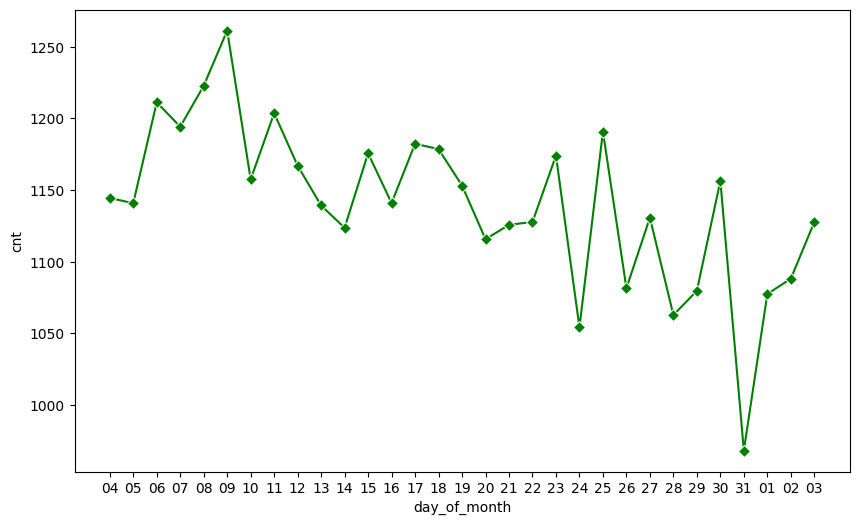

In [65]:
plt.figure(figsize=(10,6))

sns.lineplot(x = "day_of_month", y = "cnt", data = df, color="g", ci=None, marker="D");

<div class="alert alert-warning alert-info">
<span style=" color:red"> 14. Plot bike shares by year

- Plot bike shares on holidays by seasons
</span>

In [66]:
df.sample(10)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,day,day_of_month,hour,month,month_of_year,year
timestamp,,,,,,,,,,,,,,,,
2016-11-05 15:00:00,2016-11-05 15:00:00,1586,9.0,6.0,58.0,24.0,2.0,False,True,Fall,Sat,05,15,11,11/2016,2016
2016-04-24 21:00:00,2016-04-24 21:00:00,373,7.5,7.0,78.5,5.5,3.0,False,True,Spring,Sun,24,21,04,04/2016,2016
2016-11-05 07:00:00,2016-11-05 07:00:00,278,6.5,3.5,78.5,16.0,3.0,False,True,Fall,Sat,05,07,11,11/2016,2016
2015-07-23 14:00:00,2015-07-23 14:00:00,1781,21.5,21.0,40.5,18.0,1.0,False,False,Summer,Thu,23,14,07,07/2015,2015
2016-08-27 12:00:00,2016-08-27 12:00:00,2301,24.5,24.5,59.0,28.0,1.0,False,True,Summer,Sat,27,12,08,08/2016,2016
2015-06-13 12:00:00,2015-06-13 12:00:00,1891,16.0,16.0,83.0,24.0,4.0,False,True,Summer,Sat,13,12,06,06/2015,2015
2016-12-21 08:00:00,2016-12-21 08:00:00,3047,10.5,9.0,85.0,26.0,3.0,False,False,Winter,Wed,21,08,12,12/2016,2016
2015-07-14 21:00:00,2015-07-14 21:00:00,915,19.0,19.0,88.0,8.0,7.0,False,False,Summer,Tue,14,21,07,07/2015,2015
2015-08-11 05:00:00,2015-08-11 05:00:00,137,16.0,16.0,68.0,6.5,1.0,False,False,Summer,Tue,11,05,08,08/2015,2015


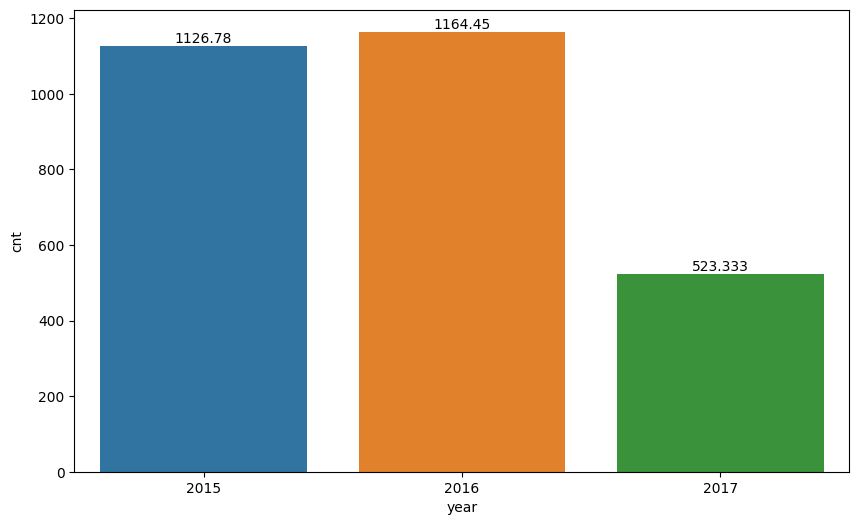

In [67]:
plt.figure(figsize=(10,6))

ax = sns.barplot(x="year", y="cnt", data= df, ci=None, palette="tab10")

for container in ax.containers:
    ax.bar_label(container);

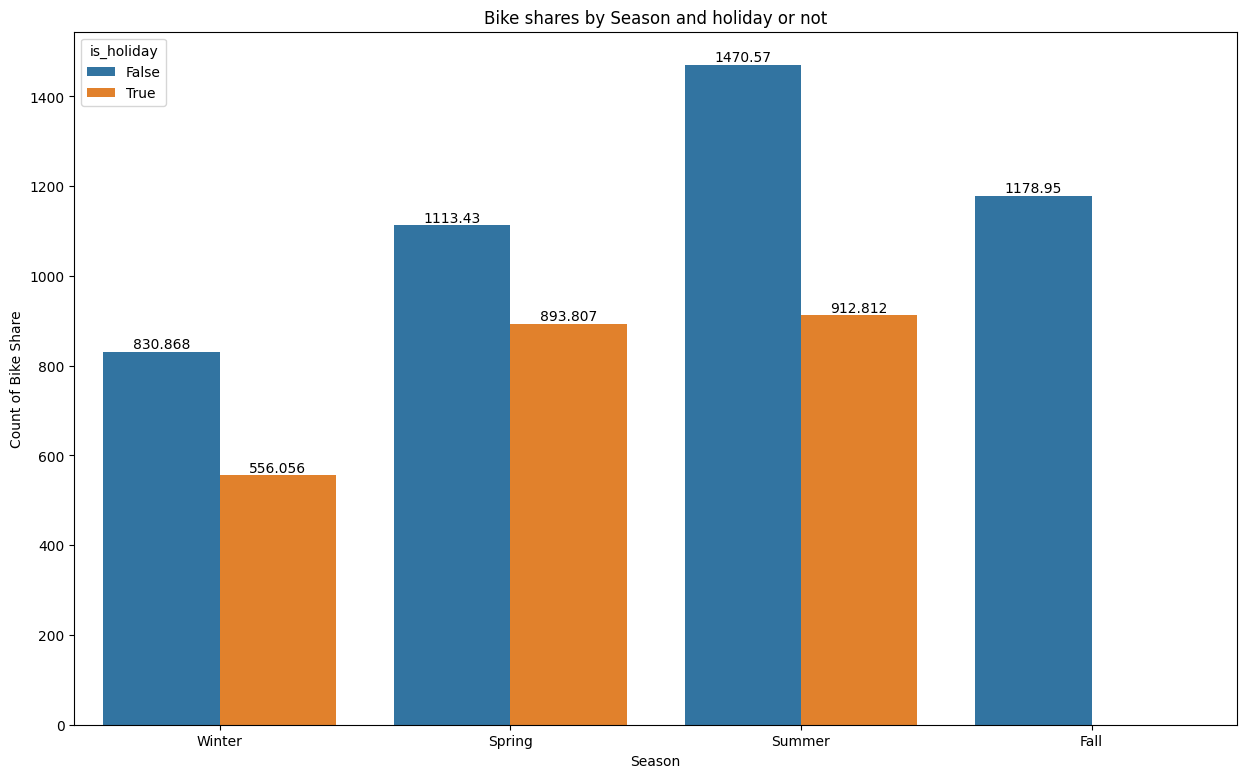

In [45]:
fig, ax = plt.subplots(figsize = (15, 9))
sns.barplot(data = df, x = df.season, y = df.cnt, hue="is_holiday", ci=None)

plt.xlabel('Season')
plt.ylabel('Count of Bike Share')
plt.title('Bike shares by Season and holiday or not')

for container in ax.containers:
    ax.bar_label(container)

plt.show();

<div class="alert alert-warning alert-info">
<span style=" color:red">15. Visualize the distribution of bike shares by weekday/weekend with piechart and barplot
</span>

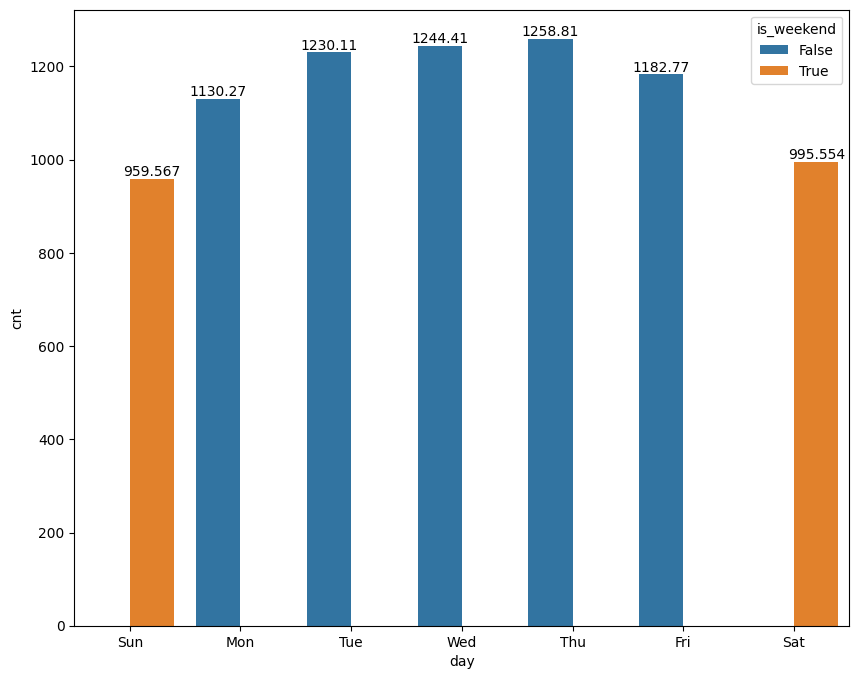

In [68]:
plt.figure(figsize=(10, 8))
ax = sns.barplot(data=df, x="day", y="cnt", hue="is_weekend",ci=None)

for container in ax.containers:
    ax.bar_label(container);

In [69]:
a = df.groupby("day")["cnt"].count().index

In [70]:
b = df.groupby("day")["cnt"].mean().values

In [71]:
a

Index(['Fri', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed'], dtype='object', name='day')

In [72]:
b

array([1182.77265306, 1130.27073365,  995.55375254,  959.56726547,
       1258.8105939 , 1230.10538922, 1244.4089996 ])

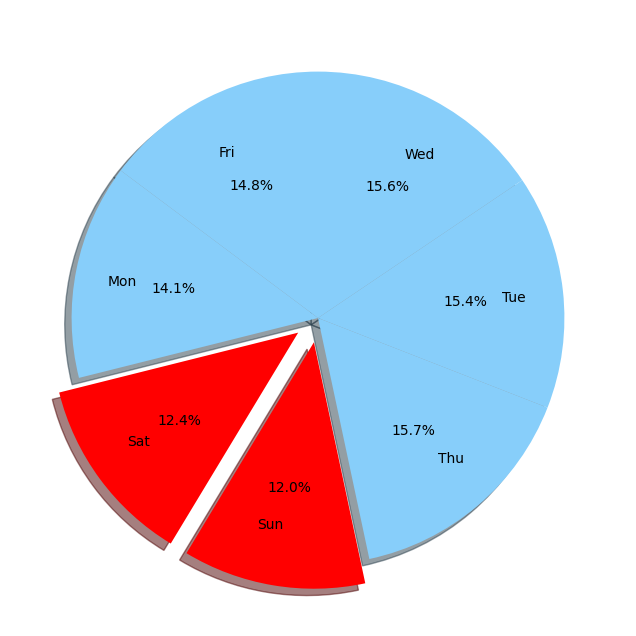

In [73]:
plt.figure(figsize=(8, 8))

myexplode = [0, 0, 0.1,0.1, 0, 0, 0]

plt.pie(b, labels=a,labeldistance=0.75, autopct='%1.1f%%', startangle=90, 
        colors=['lightskyblue','lightskyblue', 'red','red','lightskyblue','lightskyblue','lightskyblue'],
        shadow=True, explode=myexplode);

<div class="alert alert-warning alert-info">
<span style=" color:red">16. Plot the distribution of weather code by seasons
</span>

In [74]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,day,day_of_month,hour,month,month_of_year,year
timestamp,,,,,,,,,,,,,,,,
2015-01-04 00:00:00,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,False,True,Winter,Sun,04,00,01,01/2015,2015
2015-01-04 01:00:00,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,False,True,Winter,Sun,04,01,01,01/2015,2015
2015-01-04 02:00:00,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,False,True,Winter,Sun,04,02,01,01/2015,2015
2015-01-04 03:00:00,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,False,True,Winter,Sun,04,03,01,01/2015,2015
2015-01-04 04:00:00,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,False,True,Winter,Sun,04,04,01,01/2015,2015


In [75]:
df.groupby("season")["weather_code"].value_counts()

season  weather_code
Fall    1.0             1356
        2.0             1034
        3.0             1011
        7.0              519
        4.0              372
        26.0              10
        10.0               1
Spring  1.0             1752
        2.0              955
        3.0              804
        7.0              544
        4.0              326
        10.0               7
        26.0               6
Summer  1.0             1822
        2.0             1119
        3.0              775
        7.0              450
        4.0              216
        10.0               5
Winter  1.0             1220
        3.0              961
        2.0              926
        7.0              628
        4.0              550
        26.0              44
        10.0               1
Name: count, dtype: int64

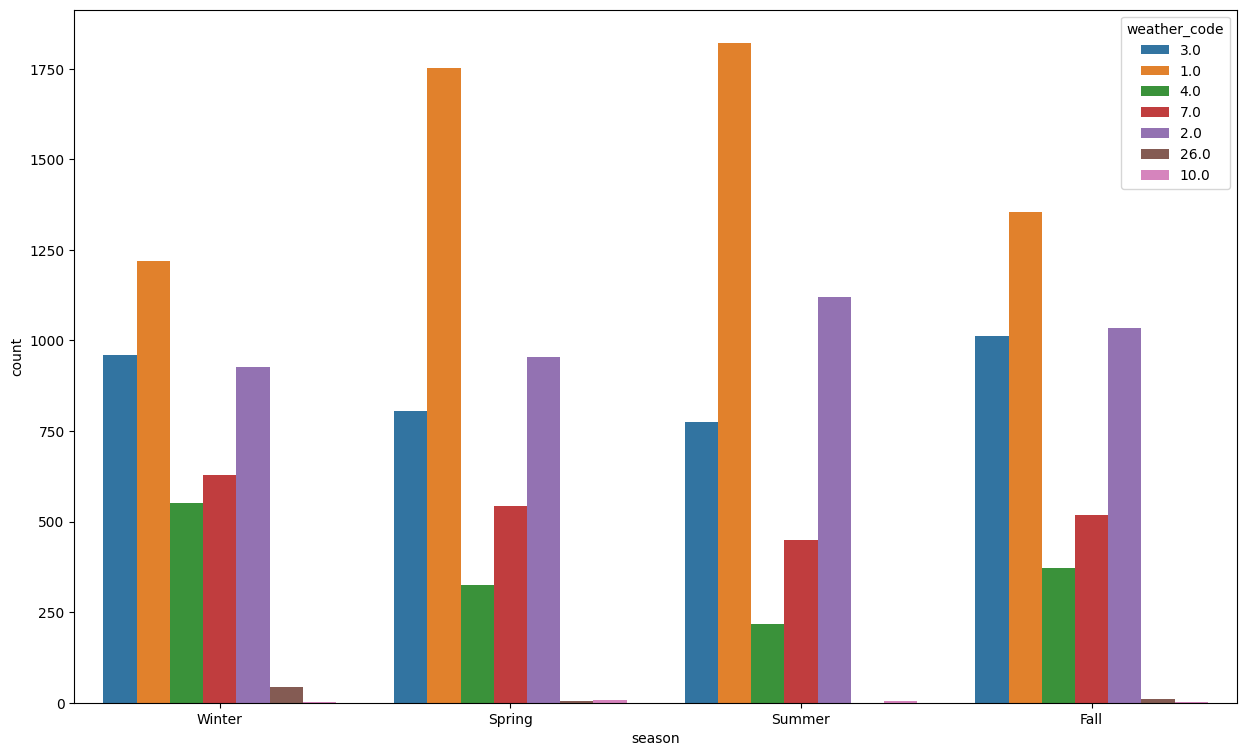

In [76]:
fig, ax = plt.subplots(figsize=(15, 9))
sns.countplot(hue='weather_code',data=df, x="season", palette="tab10");

# weather_code
sns.countplot(x='weather_code',data=df)

1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
2 = scattered clouds / few clouds
3 = Broken clouds
4 = Cloudy
7 = Rain/ light Rain shower/ Light rain
10 = rain with thunderstorm
26 = snowfall
94 = Freezing Fog

<div class="alert alert-info alert-info ">

# <span style=" color:red">Conclusions
    

    

</span>

**1.** <span style="color:blue">Veri seti Londrada şehir içi ulaşımında kullanılan bisiklet paylaşım sisteminin 04.01.2015 ve 03.01.2017 aralığını kapsayan saatlik düzenli ölçümlerini içermektedir.</span>

**2.** <span style="color:blue">İki yıllık süreçte sistem toplam 20 milyon, günlük ortalama 27.543 kez ve saatlik ortalama olarakta 1.143 kez kullanılmıştır.</span>

**3.** <span style="color:blue">Havanın nemli olması ile sistemin kullanımı arasında negatif yönlü orta düzeyde bir ilişki vardır. Ayrıca Sıcaklık ile orta düzeyde pozitif bir ilişki vardır. Rüzgar hızı ile çok az düzeyde pozitif ilişki mevcuttur.</span>

**4.** <span style="color:blue">9 Temmuz 2015 ve 06 Ağustos 2015 tarihlerinde en fazla saatlik kullanım adetlerine ulaşmıştır. Yapılan araştırmada bu tarihlerde şehirde genel kapsamlı toplu taşıma grevi olduğu tespit edilmiştir.</span>

**5.** <span style="color:blue">Ortalama bisiklet kullanımı her yılın Temmuz ayında zirve noktasına ulaştıktan sonra düşüş trendine, Ocak ayında ise yükseliş trendine girmektedir.</span>

**6.** <span style="color:blue">Sistem en çok 08:00 ile 17:00 saatleri civarında en az 04:00 civarında kullanılmıştır.</span>

**7.** <span style="color:blue">Tatil günlerinde gündüz saatlerinde kullanım sayıları belirgin bir farklılık göstermemekle birlikte en yoğun kullanıma 14:00 civarında ulaşıldığı görülmüştür.</span>

**8.** <span style="color:blue">Mevsim bazında bisiklet kullanımın en fazladan aza doğru sıralaması Yaz, Sonbahar, İlkbahar, Kış şeklindedir.</span>

**9.** <span style="color:blue">Ortalama günlük kullanım tatil olmayan hafta içi günlerde her zaman daha fazla kullanılmıştır. Hafta sonlarına bakıldığında ise bir miktar daha az kullanım görülmektedir.</span>

**10.** <span style="color:blue">Düzenli olmamakla birlikte ay başından ay sonuna doğru kullanım trendi düşüş eğilimi göstermektedir. Ortalama günlük kullanımın ayın 31. gününde en az değere sahip olduğu da görülmektedir.</span>


<div class="alert alert-block alert-info">
<span style=" color:red">Thanks for Attending!..
    

</span>

# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Bike Demand Project</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [Whatsapp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [LinkedIn](https://www.linkedin.com/company/techproeducation/mycompany/) |